# Linear Regression Model

- The model has been implemented from the scratch using the libraries **Numpy**, **Matplotlib**.

In [ ]:
from google.colab import files
files.upload()

Saving linear_regression.py to linear_regression.py


{'linear_regression.py': b'\'\'\' Linear Regression Model \'\'\'\r\n\r\n# Importing necessary libraries\r\nimport numpy as np\r\nimport matplotlib.pyplot as plt\r\nimport pandas as pd\r\n\r\nclass LinearRegression:\r\n    # Initializing some useful variables\r\n    def __init__(self,lr = 0.05,lamda = 0.0001,L1_ratio=0.5,num_iters = 500):\r\n        \'\'\' \'__init__\' takes arguments as Learning Rate(lr), Regularization Constant(lamda), L1 ratio, Number of Iteration(num_iters)\'\'\'\r\n        # All these parameters have been initialized by their default values, they can be changed when required\r\n        self.lr = lr\r\n        self.lamda = lamda\r\n        self.L1_ratio = L1_ratio\r\n        self.num_iters = num_iters\r\n\r\n    \'\'\' Feature scaling using Standardization Technique \'\'\'\r\n    def feature_scale(self,X):\r\n        for i in range(X.shape[1]):\r\n            X[:,i] = (X[:,i] - np.mean(X[:,i]))/(np.std(X[:,i] + 1e-8)) \r\n        return X\r\n    \r\n    \'\'\' It ta

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Importing, splitting and assigning the training data
train_data = pd.read_csv('sample_data/mnist_train_small.csv', header = None)
Xtrain = np.array(train_data.iloc[:,1:])
ytrain = np.array(train_data.iloc[:,0:1])

#Importing, splitting and assigning the testing data
test_data = pd.read_csv('sample_data/mnist_test.csv', header=None)
Xtest = np.array(test_data.iloc[:,1:])
ytest = np.array(test_data.iloc[:,0:1])

In [ ]:
train_samples = Xtrain.shape[0]
test_samples = Xtest.shape[0]
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(20000, 784) (20000, 1)
(10000, 784) (10000, 1)


In [ ]:
from linear_regression import LinearRegression

In [ ]:
a = LinearRegression(lr=1e-3,lamda=1e-3,L1_ratio=0.5,num_iters=500)
# Takes Xtrain, ytrain and updates parameters.
a.fit(Xtrain,ytrain)

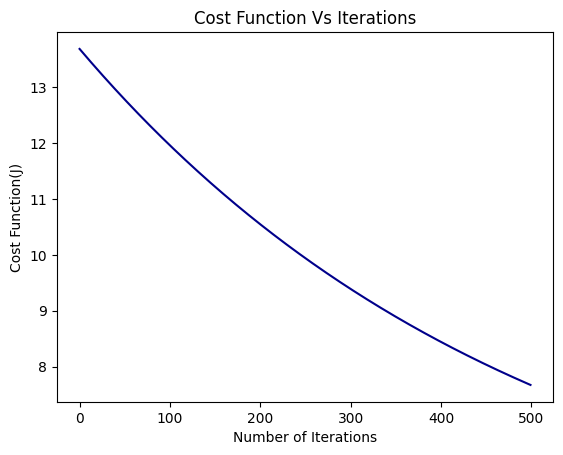

In [ ]:
a.plot()    # Plotting (Cost Function vs Iterations)

In [ ]:
# Finds the threshold value which gives maximum training accuracy.
ypred = a.predict(Xtrain)
threshold_value,max_accuracy = a.threshold(ytrain,ypred) # Threshold value for maximum accuracy.
print('Threshold Value for Maximum accuracy : ',threshold_value)
print('Maximum Accuracy for the Training Data : ',max_accuracy)

# Calculates and prints accuracy of trained model with the test data.
ytpred = a.predict(Xtest)    # Values predicted by the model
ytpred = a.ypred_threshold(ytpred,threshold_value)    # Predicted values with respect to threshold value
yt_accuracy = a.accuracy(ytest,ytpred)
print("Test data accuracy: ",yt_accuracy)

Threshold Value for Maximum accuracy :  0.8
Maximum Accuracy for the Training Data :  18.69
Test data accuracy:  18.4


## Plot between expected and predicted outcomes

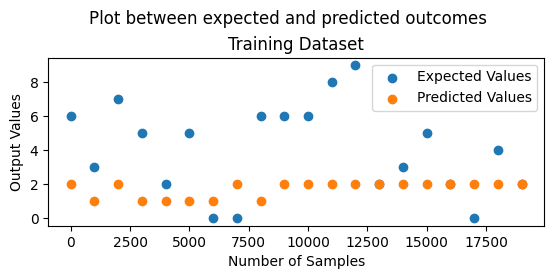

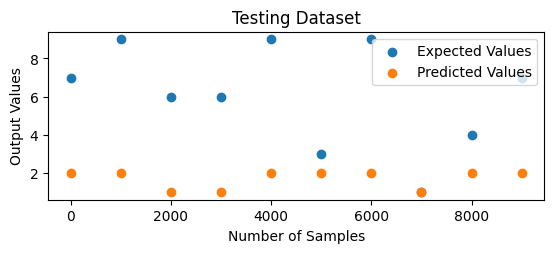

In [ ]:
fig = plt.figure(0)
plt.suptitle("Plot between expected and predicted outcomes")
plt.subplot(2,1,1)
plt.scatter(list(range(0,train_samples,1000)),ytrain[0:train_samples:1000,:],label="Expected Values")
plt.scatter(list(range(0,train_samples,1000)),a.ypred_threshold(ypred,threshold_value)[0:train_samples:1000,:],label="Predicted Values")
plt.xlabel("Number of Samples")
plt.ylabel("Output Values")
plt.title("Training Dataset")
plt.legend()
plt.show()
plt.subplot(2,1,2)
plt.scatter(list(range(0,test_samples,1000)),ytest[0:test_samples:1000,:],label="Expected Values")
plt.scatter(list(range(0,test_samples,1000)),ytpred[0:test_samples:1000,:],label="Predicted Values")
plt.xlabel("Number of Samples")
plt.ylabel("Output Values")
plt.title("Testing Dataset")
plt.legend()
plt.show()

## Linear Regression using scikit learn

In [ ]:
# Linear Regression using scikit learn.
from sklearn.linear_model import LinearRegression
model = LinearRegression()

''' Feature scaling is already done in the beginning, therefore no need to do it again '''
# Takes X, y(Training data) and updates parameters.
model.fit(Xtrain,ytrain)

# Finds the threshold which gives maximum training accuracy.
ypred = model.predict(Xtrain)
sk_threshold_value,sk_max_accuracy = a.threshold(ytrain,ypred)
print('Threshold Value for Maximum accuracy : ',sk_threshold_value)
print('Maximum Accuracy Score for the Training Data : ',sk_max_accuracy)

# Calculates and prints accuracy of trained model with test data.
sk_yt_pred = model.predict(Xtest)    # Values predicted by model
sk_yt_pred = a.ypred_threshold(sk_yt_pred,sk_threshold_value)    # Predicted values with respect to threshold value
sk_yt_acc = a.accuracy(ytest,sk_yt_pred)
print("Test data accuracy: ",sk_yt_acc)

Threshold Value for Maximum accuracy :  0.9
Maximum Accuracy Score for the Training Data :  24.03
Test data accuracy:  19.34
